# 결정트리

## 분류분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# data import
df_wine = pd.read_csv('./wine.csv')

df_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# ttsplit
X = df_wine[['alcohol', 'sugar', 'pH']].to_numpy()
y = df_wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(f'=== Probability ===\n{lr.predict_proba(X_test_scaled[200:205])}')
print(f'=> {lr.predict(X_test_scaled[200:205])}')
print(f'\n=== Scores ===')
print(f'Train score: {lr.score(X_train_scaled, y_train)}')
print(f'Test score : {lr.score(X_test_scaled, y_test)}') 

=== Probability ===
[[0.00775812 0.99224188]
 [0.54728346 0.45271654]
 [0.35285818 0.64714182]
 [0.52895712 0.47104288]
 [0.60790901 0.39209099]]
=> [1. 0. 1. 0. 0.]

=== Scores ===
Train score: 0.7808350971714451
Test score : 0.7776923076923077


In [4]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

print(f'=== Scores ===')
print(f'Train score: {dtc.score(X_train, y_train)}')
print(f'Test score : {dtc.score(X_test, y_test)}') 

=== Scores ===
Train score: 0.996921300750433
Test score : 0.8584615384615385


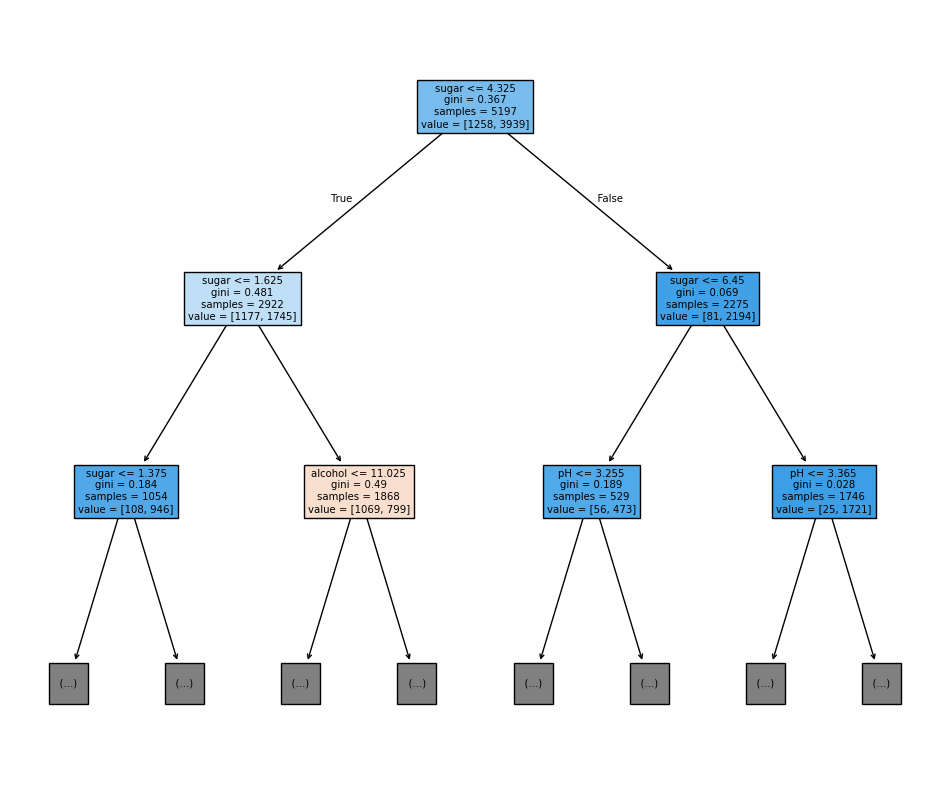

In [5]:
from sklearn.tree import plot_tree
# gini: 불순도
# 1-(음성클래스비율^2 + 양성클래스비율^2)
# gini = 1 - ((1258/5197)**2 + (3939/5197)**2)
# print(gini)
# 비율이 1:1이면 gini가 0.5가 나온다 -> 분류 안된것
# 비율이 한쪽으로 몰리는 것 -> gini가 0에 가까워진다
# gini가 0이면 하나만 남아서 분류가 끝난 것


plt.figure(figsize=(12,10))
plot_tree(dtc, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

=== Scores ===
Train score: 0.8454877814123533
Test score : 0.8415384615384616


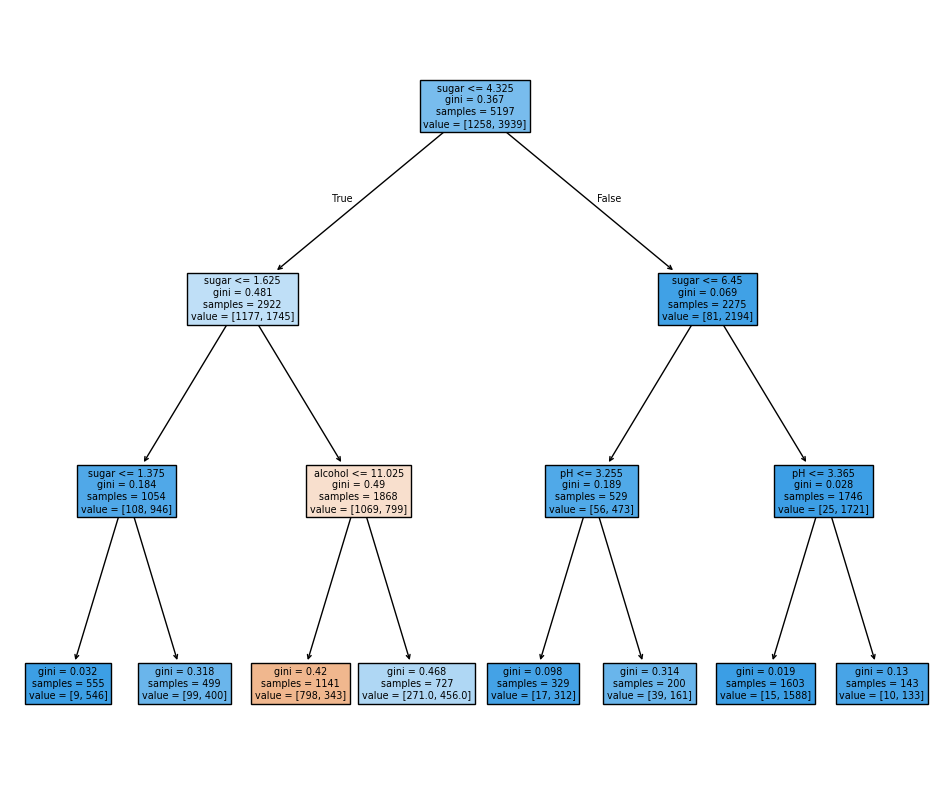

In [6]:
# hyperparameter = max_depth, 깊이 제한을 적당히 주면 복잡도가 내려간다
dtc_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_3.fit(X_train, y_train)

print(f'=== Scores ===')
print(f'Train score: {dtc_3.score(X_train, y_train)}')
print(f'Test score : {dtc_3.score(X_test, y_test)}') 
# 복잡도를 내렸는데 생각보다 테스트 점수가 많이 떨어지지 않음

plt.figure(figsize=(12,10))
plot_tree(dtc_3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# DT에서는 사실 스케일링 필요가 없다
# 더이상 depth가 내려가지 않는 기준: 1. 더이상 넣을 기준이 없을 때 / 2. 모든 잎노드를 순수노드로 만들었을 때 / 3. gini가 계속 똑같을 때
# 다만 depth가 내려갈수록 과대적합이 커진다

# 교차 검증(Cross Validation)

테스트 점수만 보는 건 과대적합에 가까운 게 아닐까? 하는 의심

테스트 점수는 최종적으로 모델을 검증하는 수단이지, 모델을 테스트 점수에 맞추면 안된다는 이야기

훈련(80)/테스트(20)로 나누는 게 아니라, 훈련(60)/검증(20)/테스트(20) 3가지로 나누자는 것

In [35]:
df_wine = pd.read_csv('./wine.csv')
X = df_wine[['alcohol', 'sugar', 'pH']]
y = df_wine['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# sub = 훈련(60%), val = 검증(20%), test = 테스트(20%) - 비율은 그렇게 중요하지는 않음
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sub, y_sub)
print(f'=== Decision Tree Classifier ===\nTrain score: {dt.score(X_sub, y_sub)}\nValid score: {dt.score(X_val, y_val)}')

=== Decision Tree Classifier ===
Train score: 0.9969207082371054
Valid score: 0.86


## k-Fold 교차검증
전체 데이터에서 테스트셋을 빼놓고, 나머지 데이터를 k개로 나눠서 일부는 훈련, 일부는 검증에 사용함

k개로 나눠진 데이터중 훈련/검증에 사용되는 부분을 다르게 하면서 훈련-검증 과정을 반복함

대부분의 데이터를 훈련에 이용할 수 있다는 점이 장점

검증 점수는 다양한 검증 과정의 결과의 평균

In [44]:
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

scores = cross_validate(dt, X_train, y_train)
print('평균 k-Fold점수:', np.mean(scores['test_score']))

# 이제 테스트 score가 아니라 평균 kfold 점수를 이용해서 모델을 평가하고, 가장 좋은 점수가 나온 경우 test를 돌려서 최종적인 결론을 내면 된다

평균 k-Fold점수: 0.855300214703487


## 하이퍼 파라미터 튜닝
사실 hyperparameter는 매우 많다 - dt에도 min_sample_split, max_depth, criterion 등등등 선택 가능한게 많다

수많은 하이퍼 파라미터에 대해 하나하나 for문을 돌려가는건 말이 안됨 - GridSearchCV를 이용함

1. 하이퍼파라미터 선택
2. 그리드서치 실행(fit)
3. 최적 조합을 찾고, 객체에 저장함
4. 최상의 매개변수에서, 전체 훈련 세트를 활용해 최종 모델을 훈련

k-Fold는 gridsearch 안에서 진행함 - cv_results_에서 볼 수 있다

In [69]:
from sklearn.model_selection import GridSearchCV
# 선택할 모델 / param_grid: 돌려볼 파라미터들 / n_jobs: 사용할 최대 CPU 개수(-1: 모두)

params = {
    # 노드 분할을 위한 최소 불순도 - 커질수록 분할을 대충 함
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),  
    # 트리 최대 깊이
    'max_depth': range(5, 21),  
    # 노드를 나누기 위한 최소 샘플 숫자
    'min_samples_split': range(2, 100, 10),  
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, n_jobs=-1)

gs.fit(X_train, y_train)

# 가장 좋은 파라미터 조합으로 모델 만들기
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [75]:
# 내부 교차검증 결과 가장 높은 점수
print(np.max(gs.cv_results_['mean_test_score']))

# 학습이 끝난 최종 모델
dt_best = gs.best_estimator_

# 아껴놨던 테스트 진행
print(f'Test score: {dt_best.score(X_test, y_test)}')

0.8683865773302731
Test score: 0.8615384615384616
